# 6장

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 6.1 매개변수 갱신

- **신경망 학습의 목적** : 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것 => 최적화

### 6.1.1 모험가 이야기

[노션 참고]

### 6.1.2 확률적 경사 하강법(SGD)

In [ ]:
# 클래스 구현
class SGD:
    def __init__(self, lr=0.01): # lr : 학습률
        self.lr = lr # 학습률을 인스턴스 변수로 유지.
        
    def update(self, params, grads): # params, grads : 딕셔너리 변수
        for key in params.keys():
            params[key] -= self.lr * grads[key]
            # params['W1'] : 가중치 매개변수
            # grads['W1'] : 기울기

In [ ]:
# 예시 구현(실제로 작동하는 코드는 아님!)
network = TwoLayerNet(...)
optimizer = SGD() # 최적화를 의미하는 optimizer로 설정.
# 모멘텀 기법에서는 optimizer = Momentum()로 설정하면 됨.

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...

### 6.1.3 SGD의 단점

[노션 참고]

### 6.1.4 모멘텀

In [5]:
# 모멘텀 기법 구현
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9): # alpha(momentum) = 0.9로 설정
        self.lr = lr
        self.momentum = momentum
        self.v = None # 물체의 속도 : 초기화 때 아무 값도 담지 않음.
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val) # 특정 shape의 행렬에 0을 채워 만듦.
                
            for key in params.keys():
                self.v[key] = self.momentum * self.v[key] - self.lr * grads[key] # 모멘텀 * 속도 - 학습률 * 기울기
                params[key] += self.v[key] # 가중치 갱신

### 6.1.5 AdaGrad

In [6]:
# AdaGrad 기법 구현
class AdaGrad:
    def  __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
            for key in params.keys():
                self.h[key] += grads[key] * grads[key]
                params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
                # 0으로 나누는 것을 방지하기 위해 1e-7을 더해준다. 

### 6.1.6 Adam

In [7]:
# 구현해놓은 Adam 클래스 훑어보기

class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

### 6.1.7 어느 갱신 방법을 이용할 것인가?

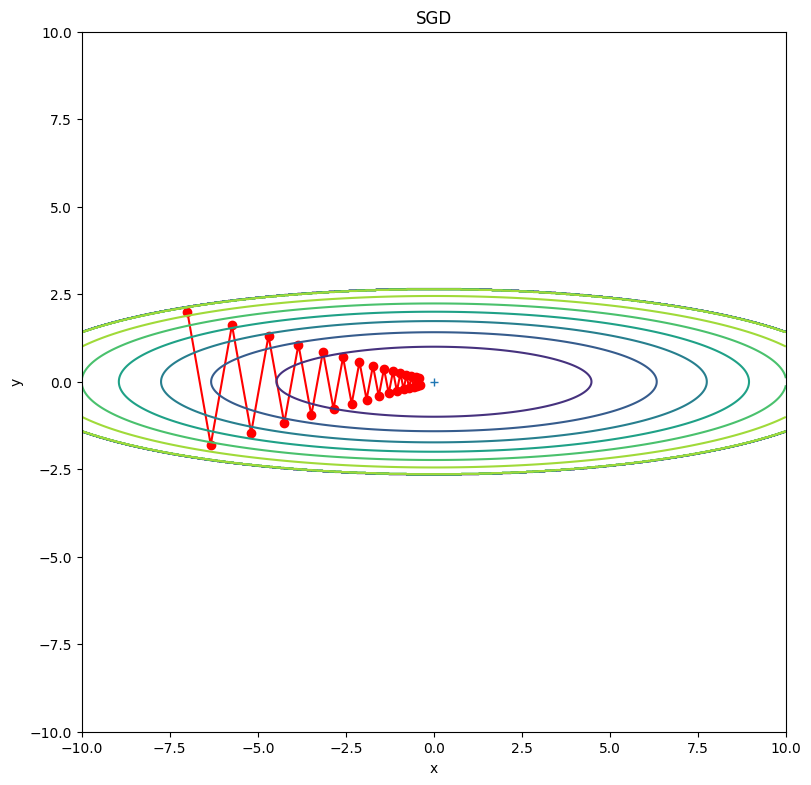

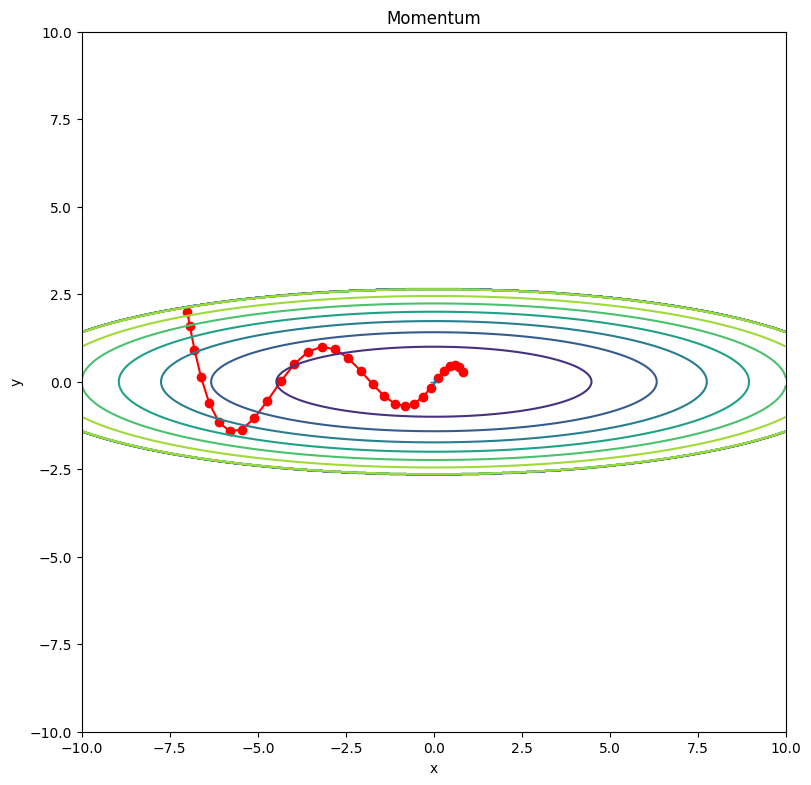

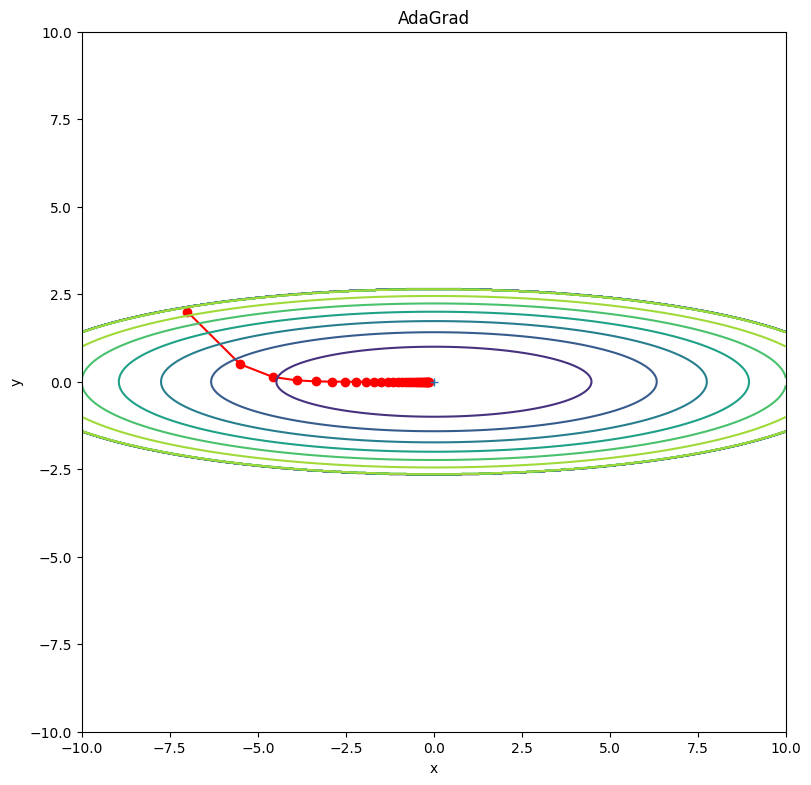

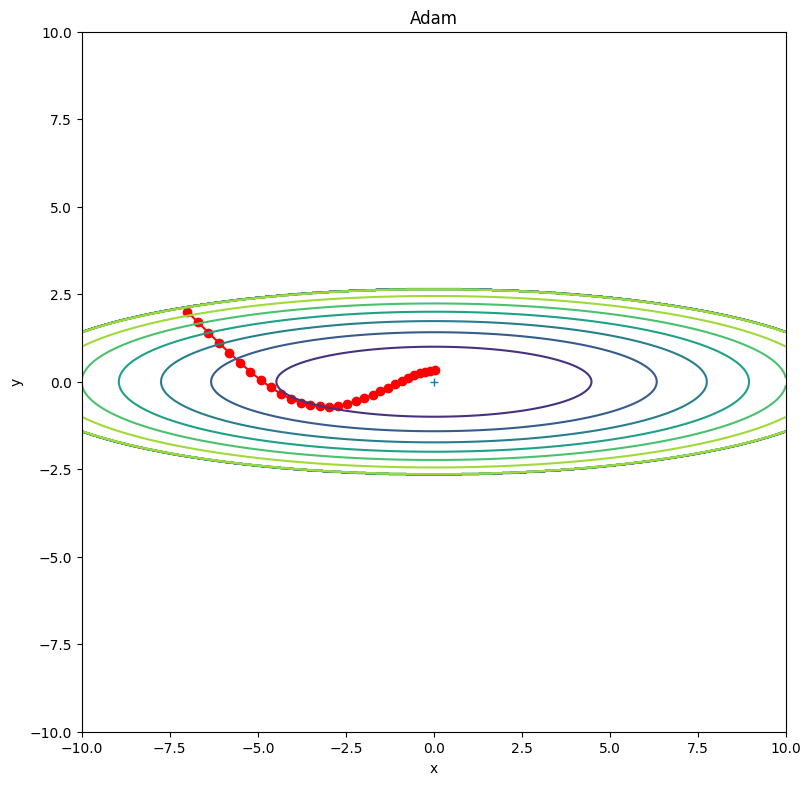

In [20]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.figure(figsize=(20,20))
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

plt.show()


### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

===========iteration:0===========
SGD:2.426468097588163
Momentum:2.3054343785862956
AdaGrad:2.3429828502451038
Adam:2.242823126761146
===========iteration:100===========
SGD:1.657072893948564
Momentum:0.27202200443991353
AdaGrad:0.11643999857777573
Adam:0.2559995056892099
===========iteration:200===========
SGD:0.9072029335696783
Momentum:0.2555856631997286
AdaGrad:0.1309365639818716
Adam:0.17093758593274078
===========iteration:300===========
SGD:0.46403163325998886
Momentum:0.15492604759854306
AdaGrad:0.06527465988678229
Adam:0.12499498971729606
===========iteration:400===========
SGD:0.4284107220101261
Momentum:0.1286555116395734
AdaGrad:0.05171982119093148
Adam:0.073851338190623
===========iteration:500===========
SGD:0.4591875377260677
Momentum:0.17657302688499935
AdaGrad:0.070185248319212
Adam:0.11868014660186185
===========iteration:600===========
SGD:0.39427025478323224
Momentum:0.16634376534488834
AdaGrad:0.05059709145625488
Adam:0.0794304693437563
===========iteration:700====

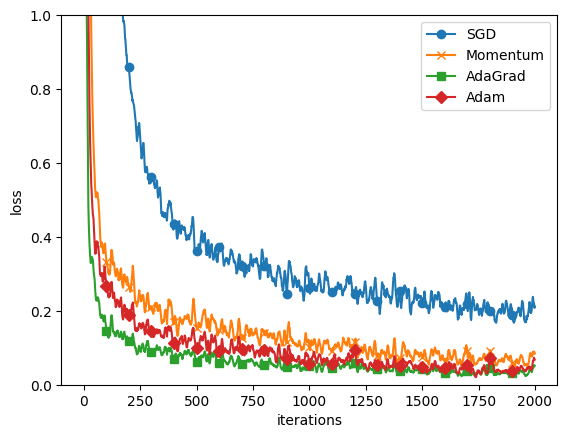

In [21]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


## 6.2 가중치의 초깃값

### 6.2.1 초깃값을 0으로 하면?

[노션 참고]

### 6.2.2 은닉층의 활성화값 분포

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1 # 표준편차가 1인 경우
    # 초깃값을 바꿔가며 해볼 수 있음
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

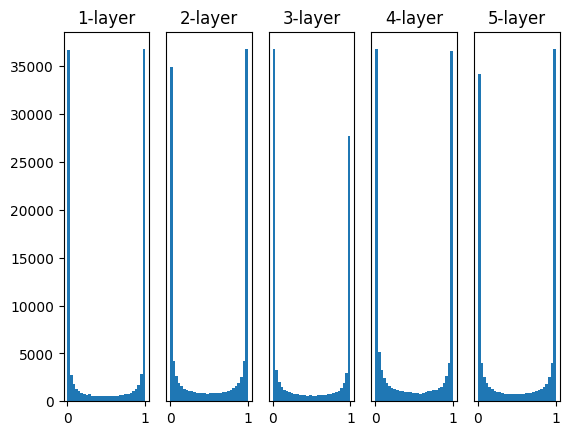

In [ ]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

===========iteration:0===========
std=0.01:2.3025204874040863
Xavier:2.30591974046977
He:2.3798052129525638
===========iteration:100===========
std=0.01:2.3018356231173245
Xavier:2.241398229824881
He:1.545542053251129
===========iteration:200===========
std=0.01:2.3020873204700223
Xavier:2.1187724004180613
He:0.8027379574990041
===========iteration:300===========
std=0.01:2.3005842749535717
Xavier:1.7364057002143378
He:0.5788247477551034
===========iteration:400===========
std=0.01:2.301422874374575
Xavier:1.1994919093109235
He:0.48924213797122845
===========iteration:500===========
std=0.01:2.3017000621909496
Xavier:0.8618659623438898
He:0.36749353077826086
===========iteration:600===========
std=0.01:2.3013806759603996
Xavier:0.5817385118486844
He:0.2479031976720285
===========iteration:700===========
std=0.01:2.3017764231739584
Xavier:0.5647772591570195
He:0.3015030256482142
===========iteration:800===========
std=0.01:2.3026160042977124
Xavier:0.5589531768602733
He:0.29439704176004

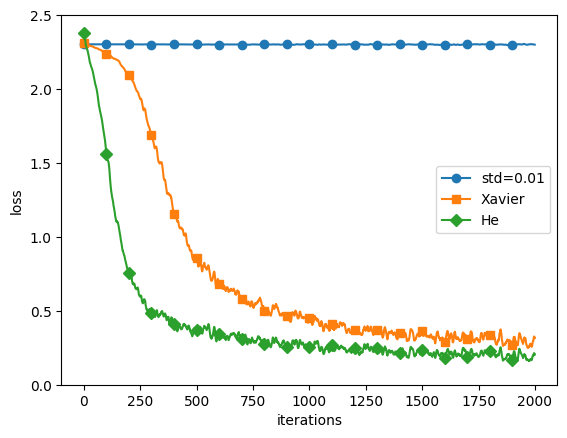

In [26]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()


In [ ]:
ㅈ